### Combined all building datas and create new Builiding column

# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,16 hours 39 mins
H2O_cluster_timezone:,America/Phoenix
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_sherlyhartono_bdxilz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.776 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# 1. Load Data

In [3]:
Bldg = pd.read_csv("../Data/microclimate_model/Combined/all_buildings.csv")
Bldg = Bldg.drop(columns = ['Unnamed: 0', "Date_Time", "CHWTON"])

In [4]:
Bldg['bldgname'].unique()

array(['Noble Library', 'Biodesign C', 'Biodesign A', 'Schwada COB',
       'Psychology', 'Goldwater', 'ISTB 2', 'Bulldog Hall', 'ISTB 4',
       'Psychology North', 'Biodesign B'], dtype=object)

Month available:<br>
May: 16, 23, 28<br>
June: 7, 8, 20, 21, 25, 26, 27<br>
July: 1<br>
August: 1, 3, 27<br>
September: 11, 29<br>


In [5]:
# 1. Get user to pick the day
day = (input("Pick month and day <mm dd>: "))
x,y = day.split(" ")
x = int(x)
y = int(y)

# 2. If date is unavailable ask to pick again
while (len(Bldg[(Bldg['Month'] == x) & (Bldg['Day'] == y)]) == 0):
    day = (input("Date unavailable, pick month and day <mm dd>: "))
    x,y = day.split(" ")
    x = int(x)
    y = int(y)

    
print("You picked month: ", x, ", day: ",y)

Pick month and day <mm dd>:  08 27


You picked month:  8 , day:  27


In [6]:
Test_df = Bldg[(Bldg['Month'] == x) & (Bldg['Day'] == y)]
Test_df.reset_index(drop = True, inplace = True)
Test_df
# Remove Test From Bldg df 
Bldg = Bldg[~((Bldg['Month'] == x) & (Bldg['Day'] == y))]
Bldg.reset_index(drop = True, inplace = True)
# Check if the day is still there
Bldg[(Bldg['Month'] == x) & (Bldg['Day'] == y)]

,bldgname,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,DSW North,DSW East,DSW South,DSW West,Shade North,Shade East,Shade South,Shade West,KW,CHWTON/SQFT,HTmmBTU


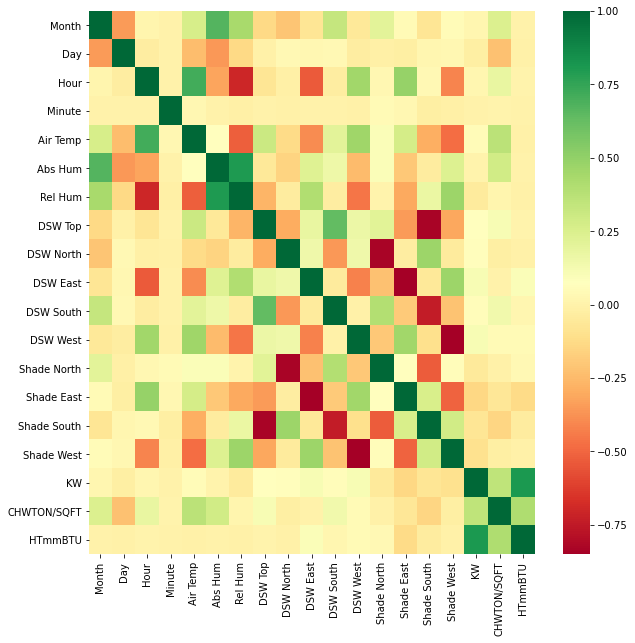

In [7]:
corrMatrix = Bldg.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, cmap='RdYlGn')
plt.show()

In [8]:
# One hot encoding
Bldg = pd.get_dummies(Bldg, drop_first = True)

In [9]:
Bldg

,Month,Day,Hour,Minute,Air Temp,Abs Hum,Rel Hum,DSW Top,DSW North,DSW East,...,bldgname_Biodesign B,bldgname_Biodesign C,bldgname_Bulldog Hall,bldgname_Goldwater,bldgname_ISTB 2,bldgname_ISTB 4,bldgname_Noble Library,bldgname_Psychology,bldgname_Psychology North,bldgname_Schwada COB
0,5,16,5,0,23.516047,4.534450,21.408253,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
1,5,16,5,15,22.987733,5.423899,26.391075,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,5,16,5,30,22.796033,5.251924,25.836088,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,5,16,5,45,22.718680,5.220844,25.797224,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
4,5,16,6,0,22.609159,5.195012,25.831215,12.571673,12.662661,5.287429,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,9,29,19,45,34.788404,7.628841,19.487521,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9873,9,29,20,0,34.618771,7.730060,19.921645,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9874,9,29,20,15,34.448187,7.886578,20.506988,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0
9875,9,29,20,30,34.306344,7.940422,20.800771,0.000000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0


In [10]:
Bldg_hf = h2o.H2OFrame(Bldg)
Bldg_hf_test = h2o. H2OFrame(Test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
Bldg_hf_split = Bldg_hf.split_frame(ratios = [0.8], seed = 1234)
Bldg_hf_train = Bldg_hf_split[0] # using 80% for training
Bldg_hf_validate = Bldg_hf_split[1] #rest 20% for testing
print(Bldg_hf_train.shape, Bldg_hf_validate.shape, Bldg_hf_test.shape)


(7944, 29) (1933, 29) (704, 20)


In [12]:
predictors = list(Bldg_hf.columns)
predictors.remove('CHWTON/SQFT')
response = 'CHWTON/SQFT'

## 1. DRF(Distributed Random Forest)

In [17]:
# Build and train the model:
drf = H2ORandomForestEstimator(ntrees=10,
                                    max_depth=5,
                                    min_rows=10,
                                    binomial_double_trees=True)

# Train and Validate
drf.train(x=predictors,
               y=response,
               training_frame=Bldg_hf_train,
               validation_frame=Bldg_hf_test)

# Eval performance:
drf_performance = drf.model_performance(test_data = Bldg_hf_test)

pred = drf.predict(Bldg_hf_validate)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [18]:
print(drf_performance)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 2.00162947220989e-06
RMSE: 0.0014147895505020843
MAE: 0.0010166086420874557
RMSLE: 0.0014092513212796563
Mean Residual Deviance: 2.00162947220989e-06



In [31]:
 drf.model_performance(test_data = Bldg_hf_test).r2()

0.21967975553905894

## 2. GLM(Generalized Linear Model)

In [22]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')# Use .train() to build the model
glm.train(x = predictors, 
          y = response, 
          training_frame = Bldg_hf_train,
          validation_frame = Bldg_hf_test)
print(glm)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 1.595E-6 )",28,27,1,py_2_sid_bf44




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 2.41954949515919e-07
RMSE: 0.0004918891638529141
MAE: 0.0003567238358662573
RMSLE: 0.0004902449556202661
R^2: 0.9047223182405233
Mean Residual Deviance: 2.41954949515919e-07
Null degrees of freedom: 7943
Residual degrees of freedom: 7916
Null deviance: 0.020173560937456616
Residual deviance: 0.0019220901189544606
AIC: -98420.88608152082

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 2.4538454429527613e-06
RMSE: 0.001566475484312717
MAE: 0.0012960686527460669
RMSLE: 0.0015606072902742763
R^2: 0.04338674939660292
Mean Residual Deviance: 2.4538454429527613e-06
Null degrees of freedom: 703
Residual degrees of freedom: 676
Null deviance: 0.0019808773823504684
Residual deviance: 0.001727507191838744
AIC: -7038.303898767762

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-11-08 09:50:03,0.000 sec,0,0.0201736,2.53947e-06,,,,,,,,
1,,2021-11-08 09:50:03,0.042 sec,1,,,0.000491889,2.41955e-07,0.000356724,0.904722,0.00156648,2.45385e-06,0.00129607,0.0433867



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,bldgname_ISTB 4,0.000641,1.000000,0.106518
1,KW,0.000546,0.851876,0.090740
2,bldgname_ISTB 2,0.000491,0.766815,0.081679
3,Air Temp,0.000450,0.702181,0.074795
4,Abs Hum,0.000445,0.694534,0.073980
5,bldgname_Bulldog Hall,0.000371,0.579319,0.061708
6,bldgname_Biodesign B,0.000371,0.578646,0.061636
7,bldgname_Noble Library,0.000370,0.576963,0.061457
8,HTmmBTU,0.000348,0.543197,0.057860
9,bldgname_Schwada COB,0.000323,0.503644,0.053647



See the whole table with table.as_data_frame()



In [21]:
glm_performance = glm.model_performance(test_data = Bldg_hf_test)
print(glm_performance)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 2.4538454429527613e-06
RMSE: 0.001566475484312717
MAE: 0.0012960686527460669
RMSLE: 0.0015606072902742763
R^2: 0.04338674939660292
Mean Residual Deviance: 2.4538454429527613e-06
Null degrees of freedom: 703
Residual degrees of freedom: 676
Null deviance: 0.0019808773823504684
Residual deviance: 0.001727507191838744
AIC: -7038.303898767762



# 3. AutoML

In [15]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1234)

In [23]:
aml.train(training_frame = Bldg_hf_train, y = response, validation_frame = Bldg_hf_validate)

AutoML progress: |
09:50:13.485: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
09:50:13.486: New models will be added to existing leaderboard AutoML_1_20211108_94804@@CHWTON_SQFT (leaderboard frame=null) with already 4 models.

██████
09:50:57.633: StackedEnsemble_BestOfFamily_2_AutoML_2_20211108_95013 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

██████
09:52:20.897: StackedEnsemble_BestOfFamily_3_AutoML_2_20211108_95013 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,59.0,59.0,613776.0,15.0,15.0,15.0,546.0,1038.0,823.1695




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.6425968796304327e-09
RMSE: 4.052896346602554e-05
MAE: 2.6494574319953564e-05
RMSLE: 4.0413546276474753e-05
Mean Residual Deviance: 1.6425968796304327e-09

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 2.3286572642059922e-08
RMSE: 0.00015259938611298515
MAE: 9.628269695279085e-05
RMSLE: 0.000152113463350602
Mean Residual Deviance: 2.3286572642059922e-08

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.1434458793789084e-08
RMSE: 0.00014640511874176081
MAE: 9.6636274023551e-05
RMSLE: 0.00014596407803934728
Mean Residual Deviance: 2.1434458793789084e-08

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.673996e-05,2.205291e-06,9.791681e-05,9.694118e-05,9.951453e-05,9.373970e-05,9.558757e-05
1,mean_residual_deviance,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
2,mse,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
3,r2,9.915097e-01,4.719470e-04,9.909227e-01,9.917306e-01,9.910892e-01,9.919779e-01,9.918284e-01
4,residual_deviance,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
5,rmse,1.467950e-04,4.295821e-06,1.519106e-04,1.445403e-04,1.509568e-04,1.427432e-04,1.438242e-04
6,rmsle,1.463540e-04,4.272079e-06,1.514355e-04,1.441029e-04,1.505005e-04,1.423269e-04,1.434041e-04



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-11-08 10:00:53,4 min 17.962 sec,0.0,0.001594,0.001306,2.539471e-06,0.001551,0.001260,2.406128e-06
1,,2021-11-08 10:00:53,4 min 18.156 sec,5.0,0.000948,0.000777,8.987752e-07,0.000930,0.000755,8.655716e-07
2,,2021-11-08 10:00:54,4 min 18.600 sec,10.0,0.000567,0.000463,3.212631e-07,0.000566,0.000457,3.207860e-07
3,,2021-11-08 10:00:54,4 min 18.910 sec,15.0,0.000343,0.000279,1.174962e-07,0.000360,0.000285,1.292826e-07
4,,2021-11-08 10:00:54,4 min 19.173 sec,20.0,0.000212,0.000170,4.491333e-08,0.000247,0.000187,6.114894e-08
5,,2021-11-08 10:00:54,4 min 19.386 sec,25.0,0.000137,0.000108,1.882008e-08,0.000193,0.000137,3.735236e-08
6,,2021-11-08 10:00:55,4 min 19.611 sec,30.0,0.000095,0.000072,9.062474e-09,0.000169,0.000114,2.856086e-08
7,,2021-11-08 10:00:55,4 min 19.894 sec,35.0,0.000072,0.000052,5.215316e-09,0.000160,0.000103,2.546214e-08
8,,2021-11-08 10:00:55,4 min 20.162 sec,40.0,0.000059,0.000041,3.530248e-09,0.000156,0.000099,2.422091e-08
9,,2021-11-08 10:00:55,4 min 20.428 sec,45.0,0.000052,0.000035,2.691609e-09,0.000154,0.000097,2.364908e-08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,HTmmBTU,0.018204,1.000000,0.185537
1,bldgname_Biodesign B,0.018109,0.994789,0.184570
2,KW,0.013187,0.724414,0.134405
3,Abs Hum,0.011578,0.636037,0.118008
4,bldgname_ISTB 2,0.011329,0.622364,0.115471
5,Air Temp,0.007772,0.426957,0.079216
6,Month,0.002026,0.111288,0.020648
7,Hour,0.001961,0.107737,0.019989
8,bldgname_Psychology,0.001817,0.099810,0.018518
9,Day,0.001560,0.085723,0.015905



See the whole table with table.as_data_frame()


In [24]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20211108_95013_model_26


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,59.0,59.0,613776.0,15.0,15.0,15.0,546.0,1038.0,823.1695




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.6425968796304327e-09
RMSE: 4.052896346602554e-05
MAE: 2.6494574319953564e-05
RMSLE: 4.0413546276474753e-05
Mean Residual Deviance: 1.6425968796304327e-09

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 2.3286572642059922e-08
RMSE: 0.00015259938611298515
MAE: 9.628269695279085e-05
RMSLE: 0.000152113463350602
Mean Residual Deviance: 2.3286572642059922e-08

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.1434458793789084e-08
RMSE: 0.00014640511874176081
MAE: 9.6636274023551e-05
RMSLE: 0.00014596407803934728
Mean Residual Deviance: 2.1434458793789084e-08

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9.673996e-05,2.205291e-06,9.791681e-05,9.694118e-05,9.951453e-05,9.373970e-05,9.558757e-05
1,mean_residual_deviance,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
2,mse,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
3,r2,9.915097e-01,4.719470e-04,9.909227e-01,9.917306e-01,9.910892e-01,9.919779e-01,9.918284e-01
4,residual_deviance,2.156355e-08,1.267145e-09,2.307683e-08,2.089190e-08,2.278797e-08,2.037563e-08,2.068539e-08
5,rmse,1.467950e-04,4.295821e-06,1.519106e-04,1.445403e-04,1.509568e-04,1.427432e-04,1.438242e-04
6,rmsle,1.463540e-04,4.272079e-06,1.514355e-04,1.441029e-04,1.505005e-04,1.423269e-04,1.434041e-04



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-11-08 10:00:53,4 min 17.962 sec,0.0,0.001594,0.001306,2.539471e-06,0.001551,0.001260,2.406128e-06
1,,2021-11-08 10:00:53,4 min 18.156 sec,5.0,0.000948,0.000777,8.987752e-07,0.000930,0.000755,8.655716e-07
2,,2021-11-08 10:00:54,4 min 18.600 sec,10.0,0.000567,0.000463,3.212631e-07,0.000566,0.000457,3.207860e-07
3,,2021-11-08 10:00:54,4 min 18.910 sec,15.0,0.000343,0.000279,1.174962e-07,0.000360,0.000285,1.292826e-07
4,,2021-11-08 10:00:54,4 min 19.173 sec,20.0,0.000212,0.000170,4.491333e-08,0.000247,0.000187,6.114894e-08
5,,2021-11-08 10:00:54,4 min 19.386 sec,25.0,0.000137,0.000108,1.882008e-08,0.000193,0.000137,3.735236e-08
6,,2021-11-08 10:00:55,4 min 19.611 sec,30.0,0.000095,0.000072,9.062474e-09,0.000169,0.000114,2.856086e-08
7,,2021-11-08 10:00:55,4 min 19.894 sec,35.0,0.000072,0.000052,5.215316e-09,0.000160,0.000103,2.546214e-08
8,,2021-11-08 10:00:55,4 min 20.162 sec,40.0,0.000059,0.000041,3.530248e-09,0.000156,0.000099,2.422091e-08
9,,2021-11-08 10:00:55,4 min 20.428 sec,45.0,0.000052,0.000035,2.691609e-09,0.000154,0.000097,2.364908e-08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,HTmmBTU,0.018204,1.000000,0.185537
1,bldgname_Biodesign B,0.018109,0.994789,0.184570
2,KW,0.013187,0.724414,0.134405
3,Abs Hum,0.011578,0.636037,0.118008
4,bldgname_ISTB 2,0.011329,0.622364,0.115471
5,Air Temp,0.007772,0.426957,0.079216
6,Month,0.002026,0.111288,0.020648
7,Hour,0.001961,0.107737,0.019989
8,bldgname_Psychology,0.001817,0.099810,0.018518
9,Day,0.001560,0.085723,0.015905



See the whole table with table.as_data_frame()



In [29]:
best_model.model_performance(Bldg_hf_test).r2()

0.3212702889044122

In [27]:
lb = aml.leaderboard

In [28]:
print(lb)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_2_20211108_95013_model_26,2.14345e-08,0.000146405,2.14345e-08,9.66363e-05,0.000145964
GBM_grid_1_AutoML_2_20211108_95013_model_1,2.14895e-08,0.000146593,2.14895e-08,9.72729e-05,0.000146149
DRF_1_AutoML_2_20211108_95013,2.15207e-08,0.000146699,2.15207e-08,9.65711e-05,0.000146256
GBM_grid_1_AutoML_2_20211108_95013_model_24,2.19555e-08,0.000148174,2.19555e-08,9.76347e-05,0.000147729
GBM_5_AutoML_2_20211108_95013,2.27533e-08,0.000150842,2.27533e-08,0.000100659,0.000150379
GBM_3_AutoML_2_20211108_95013,2.31503e-08,0.000152152,2.31503e-08,0.000103341,0.00015169
GBM_4_AutoML_2_20211108_95013,2.33247e-08,0.000152724,2.33247e-08,0.000102629,0.000152258
GBM_grid_1_AutoML_2_20211108_95013_model_23,2.34841e-08,0.000153245,2.34841e-08,0.000101744,0.000152776
GBM_grid_1_AutoML_2_20211108_95013_model_13,2.35977e-08,0.000153615,2.35977e-08,0.000101764,0.000153156
GBM_grid_1_AutoML_2_20211108_95013_model_4,2.43652e-08,0.000156094,2.43652e-08,0.000102481,0.00015561
